# Importing Required Packages

In [38]:
import re
from tqdm import tqdm
from nltk.corpus import stopwords
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import tensorflow as tf
from transformers import AutoTokenizer, TFAutoModel

# Loading the Dataset

In [39]:
train_df = pd.read_csv("E:/Codes/Python/Project/train.csv")
test_df = pd.read_csv("E:/Codes/Python/Project/test.csv")

df = pd.concat([train_df, test_df])

In [40]:
df.head()

,title,company,location,date,description
0,Business Analyst,Apollo Hospitals,"Chennai, Tamil Nadu, India",1 week ago,Actively Hiring
1,IT Service Desk (Desktop Support),Wipro,"Hyderabad, Telangana, India",2 weeks ago,Actively Hiring
2,Information Technology Manager,Accor,Mumbai Metropolitan Region,4 weeks ago,Actively Hiring
3,Technical Support Engineer,LTIMindtree,"Hyderabad, Telangana, India",2 weeks ago,Actively Hiring
4,HRMS Analyst,airtel,"Gurugram, Haryana, India",3 weeks ago,Actively Hiring


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 336 entries, 0 to 36
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        336 non-null    object
 1   company      336 non-null    object
 2   location     336 non-null    object
 3   date         336 non-null    object
 4   description  336 non-null    object
dtypes: object(5)
memory usage: 15.8+ KB


# Preparing the Dataset

**# Normalize Columns**

In [42]:
df.columns = [col.lower() for col in df.columns]
df.head()

,title,company,location,date,description
0,Business Analyst,Apollo Hospitals,"Chennai, Tamil Nadu, India",1 week ago,Actively Hiring
1,IT Service Desk (Desktop Support),Wipro,"Hyderabad, Telangana, India",2 weeks ago,Actively Hiring
2,Information Technology Manager,Accor,Mumbai Metropolitan Region,4 weeks ago,Actively Hiring
3,Technical Support Engineer,LTIMindtree,"Hyderabad, Telangana, India",2 weeks ago,Actively Hiring
4,HRMS Analyst,airtel,"Gurugram, Haryana, India",3 weeks ago,Actively Hiring


**# Create `text` Column by Compining `title` and `company`**

In [43]:
df["text"] = df["title"] + "_" + df["company"]

In [44]:
df.head()

,title,company,location,date,description,text
0,Business Analyst,Apollo Hospitals,"Chennai, Tamil Nadu, India",1 week ago,Actively Hiring,Business Analyst_Apollo Hospitals
1,IT Service Desk (Desktop Support),Wipro,"Hyderabad, Telangana, India",2 weeks ago,Actively Hiring,IT Service Desk (Desktop Support)_Wipro
2,Information Technology Manager,Accor,Mumbai Metropolitan Region,4 weeks ago,Actively Hiring,Information Technology Manager_Accor
3,Technical Support Engineer,LTIMindtree,"Hyderabad, Telangana, India",2 weeks ago,Actively Hiring,Technical Support Engineer_LTIMindtree
4,HRMS Analyst,airtel,"Gurugram, Haryana, India",3 weeks ago,Actively Hiring,HRMS Analyst_airtel


**# Select the Relevant Features Only**

In [45]:
df = df[["text", "location"]]

In [46]:
df.head()

,text,location
0,Business Analyst_Apollo Hospitals,"Chennai, Tamil Nadu, India"
1,IT Service Desk (Desktop Support)_Wipro,"Hyderabad, Telangana, India"
2,Information Technology Manager_Accor,Mumbai Metropolitan Region
3,Technical Support Engineer_LTIMindtree,"Hyderabad, Telangana, India"
4,HRMS Analyst_airtel,"Gurugram, Haryana, India"


In [47]:
df["category"] = "Information Technology"

In [48]:
df.head()

,text,location,category
0,Business Analyst_Apollo Hospitals,"Chennai, Tamil Nadu, India",Information Technology
1,IT Service Desk (Desktop Support)_Wipro,"Hyderabad, Telangana, India",Information Technology
2,Information Technology Manager_Accor,Mumbai Metropolitan Region,Information Technology
3,Technical Support Engineer_LTIMindtree,"Hyderabad, Telangana, India",Information Technology
4,HRMS Analyst_airtel,"Gurugram, Haryana, India",Information Technology


# Preprocessing the Dataset

In [49]:
def clean_text(text):

    text = text.lower()
    text = re.sub("[^a-zA-Z0-9]", " ", text)
    text = text.split()
    text = [word for word in text if word not in stopwords.words("english")]

    return " ".join(text)


def clean_df_text(texts):
    
    all_cleaned_texts = []

    for text in tqdm(texts):
        cleaned_text = clean_text(text)
        all_cleaned_texts.append(cleaned_text)

    return all_cleaned_texts

In [50]:
import nltk

# Download the stopwords resource
nltk.download('stopwords')

# Now you can import and use the stopwords
from nltk.corpus import stopwords

# Example usage
stop_words = set(stopwords.words('english'))
print(stop_words)


{'who', 'your', 'him', 'there', 'for', 'not', 'so', 'me', 'through', 'his', "needn't", "shan't", 'while', 'itself', 'up', 'why', 'down', 'don', 'some', "haven't", "mightn't", 'yourself', 'most', 'shan', 'mustn', 'them', 'couldn', 'this', 'nor', 'been', "wasn't", 'that', 'by', 'wouldn', 'those', 'all', 'are', 'or', 'because', 'you', 'd', 'y', "hasn't", 'her', 'as', 'hadn', "that'll", 'than', "aren't", 'here', "shouldn't", 'a', 'more', 'under', "don't", 'out', 'does', 'own', 'once', 'was', 'they', 'these', 'should', 'where', "won't", "hadn't", 'when', 'myself', 'yours', 'very', 'our', 'too', 'on', 'few', 'after', 'herself', 'if', 'from', 'off', 'both', 'whom', 'theirs', "wouldn't", 'each', 'any', 'he', 'will', 'now', 'again', 'mightn', 'i', 'no', 'ours', 'in', 't', 'such', 'with', 'above', 'am', 'below', 'ain', 'it', 'we', "you'll", 'having', 'the', 'themselves', 'about', 'shouldn', 'can', 'is', 'into', 'at', 'hasn', 'until', "you're", 'and', 'didn', 'how', 'wasn', 'isn', 'won', 'only', 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\omsag\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
cleaned_texts = clean_df_text(df["text"])
df["clean_text"] = cleaned_texts

100%|██████████| 336/336 [00:00<00:00, 821.96it/s]


In [52]:
df.head()

,text,location,category,clean_text
0,Business Analyst_Apollo Hospitals,"Chennai, Tamil Nadu, India",Information Technology,business analyst apollo hospitals
1,IT Service Desk (Desktop Support)_Wipro,"Hyderabad, Telangana, India",Information Technology,service desk desktop support wipro
2,Information Technology Manager_Accor,Mumbai Metropolitan Region,Information Technology,information technology manager accor
3,Technical Support Engineer_LTIMindtree,"Hyderabad, Telangana, India",Information Technology,technical support engineer ltimindtree
4,HRMS Analyst_airtel,"Gurugram, Haryana, India",Information Technology,hrms analyst airtel


# 1. Native Search (TF-IDF)

In [53]:
tf_idf_vectorizer = TfidfVectorizer(stop_words="english")
tf_idf_matrix = tf_idf_vectorizer.fit_transform(cleaned_texts)
print(tf_idf_matrix.shape)

(336, 365)


In [54]:
def semantic_search_tf_idf(query, tf_idf_matrix, tf_idf_vectorizer, top_n=5):
    """
    Perform semantic search for the `query` and print the `top_n`
    similar results the the given `query` based on TF-IDF technique.

    Parameters
    ----------
    - query : str
        A specific query that we need to return similar documents to it.

    - tf_idf_matrix : np.sparse_array
        A numpy array contains the tf_idf vectors for each sample in the
        dataset.
    
    - tf_idf_vectorizer : keras.TfidfVectorizer
        A TfidfVectroizer to be able to vectorize the given `query`.
    
    - top_n : int, default=5
        An integer value indicated the number of returned similar documents.
    """

    cleaned_query = clean_text(query)
    query_vector = tf_idf_vectorizer.transform([cleaned_query])

    cosine_similarities = cosine_similarity(query_vector, tf_idf_matrix).flatten()
    related_docs_indices = cosine_similarities.argsort()[:-top_n-1:-1]
    realted_doc_scores = sorted(cosine_similarities, reverse=True)[:top_n]

    # Display the top related documents
    print(f"Top {top_n} Results for Query: '{query}'")
    for i, idx in enumerate(related_docs_indices):
        print(f"{i + 1}. Category: {df.iloc[idx]['category']}\n")
        print(f"   Text: {df.iloc[idx]['clean_text']}\n")
        print(f"   Similarity: {realted_doc_scores[i]:.4f}")
        print("="*50)

### Testing on a Random Query from the Dataset

In [55]:
random_index = np.random.randint(0, len(df))
query = df["clean_text"].iloc[random_index]
category = df["category"].iloc[random_index]

print(f"Query of index: {random_index}: ")
print(query)
print(f"\nCategory of index: {random_index}: ")
print(category)

Query of index: 58: 
helpdesk analyst sprinklr

Category of index: 58: 
Information Technology


### Perform semantic search using TF-IDF

In [56]:
semantic_search_tf_idf(query, tf_idf_matrix, tf_idf_vectorizer)

Top 5 Results for Query: 'helpdesk analyst sprinklr'
1. Category: Information Technology

   Text: helpdesk analyst sprinklr

   Similarity: 1.0000
2. Category: Information Technology

   Text: helpdesk analyst sprinklr

   Similarity: 1.0000
3. Category: Information Technology

   Text: helpdesk analyst sprinklr

   Similarity: 1.0000
4. Category: Information Technology

   Text: helpdesk analyst us shift sprinklr

   Similarity: 0.7848
5. Category: Information Technology

   Text: helpdesk analyst toast

   Similarity: 0.5071


# 2. Sementic search (Doc2vec model)

### Creating the  model

In [57]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# tokenize that data to be in the form that is expected by `Doc2Vec` model.
tokenized_data = [text.split() for text in cleaned_texts]
#print(tokenized_data)
# Tag each document with an index
tagged_data = [TaggedDocument(words=words, tags=[str(i)]) for i, words in enumerate(tokenized_data)]
#print(tagged_data)
# Initialize the Doc2Vec model
doc2vec_model = Doc2Vec(vector_size=300, window=5, min_count=1, workers=4, epochs=20)
# Build the vocabulary
doc2vec_model.build_vocab(tagged_data)

### Training the `Doc2Vec` Model on the Dataset

In [58]:
# Train the model
doc2vec_model.train(tqdm(tagged_data), total_examples=doc2vec_model.corpus_count, epochs=doc2vec_model.epochs)

100%|██████████| 336/336 [00:00<00:00, 40659.13it/s]


In [59]:
# Get the embeddings for each document in dataframe
documents_doc2vec_embeddings = np.array([doc2vec_model.infer_vector(words) for words in tqdm(tokenized_data)])
print(f"documents_doc2vec_embeddings shape: {documents_doc2vec_embeddings.shape}")

100%|██████████| 336/336 [00:00<00:00, 1566.05it/s]

documents_doc2vec_embeddings shape: (336, 300)


In [60]:
def semantic_search_doc2vec(query, documents_doc2vec_embeddings, model, top_n=5):
    """
    Perform semantic search for the `query` and print the `top_n`
    similar results the the given `query` based on Doc2Vec model.

    Parameters
    ----------
    - query : str
        A specific query that we need to return similar documents to it.
    
    - documents_doc2vec_embeddings : np.array
        A numpy array contains the doc2vec embedding vectors for each
        sample in the dataset.
    
    - model : gensim.Doc2Vec
        A Doc2Vec model to be able to vectorize the given `query`.
    
    - top_n : int, default=5
        An integer value indicated the number of returned similar documents.
    """
    
    # Clean the query
    cleaned_query = clean_text(query)
    # Put the query in format suitable for the `model`
    query_words = cleaned_query.split()
    # Get the embedding of the query
    query_embedding = model.infer_vector(query_words)
    # Calculate cosine similarities between the query and all vectors in the dataset
    cosine_similarities = cosine_similarity([query_embedding], documents_doc2vec_embeddings)[0]
    # Get the top_n similar documents to the query
    related_docs_indices = np.argsort(cosine_similarities)[-top_n:][::-1]

    # Display the top related documents
    print(f"Top {top_n} Results for Query: '{query}'")
    for i, idx in enumerate(related_docs_indices):
        print(f"{i + 1}. Category: {df.iloc[idx]['category']}\n")
        print(f"   Text: {df.iloc[idx]['clean_text']}\n")
        print(f"   Similarity: {cosine_similarities[idx]:.4f}")
        print("="*50)

### Testing on Random Query

In [61]:
# Perform semantic search using Doc2Vec
semantic_search_doc2vec(query, documents_doc2vec_embeddings, doc2vec_model)

Top 5 Results for Query: 'helpdesk analyst sprinklr'
1. Category: Information Technology

   Text: helpdesk analyst sprinklr

   Similarity: 0.9997
2. Category: Information Technology

   Text: helpdesk analyst sprinklr

   Similarity: 0.9987
3. Category: Information Technology

   Text: helpdesk analyst sprinklr

   Similarity: 0.9983
4. Category: Information Technology

   Text: technical customer support executive feasible technologies pvt ltd

   Similarity: 0.9495
5. Category: Information Technology

   Text: deputy vice president los amp digital initiatives aye finance pvt ltd

   Similarity: 0.9494


# 3. Semantic Search (Sentence Transformers)

### Loading the Tokenizer and the Model

In [62]:
model_ckpt = "sentence-transformers/all-MiniLM-L6-v2"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
model = TFAutoModel.from_pretrained(model_ckpt)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['embeddings.position_ids']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


### Getting the `input_ids` and `attention_mask` for each Sample in the Dataset

In [63]:
encoded_documents = tokenizer(cleaned_texts, padding=True, truncation=True, return_tensors="tf")

In [64]:
len(df)

336

### Get the Embeddings for each Sample in the Dataset

In [65]:
documents_minilm_embeddings = np.zeros((len(df), 384))
input_ids_batches = np.array_split(encoded_documents['input_ids'], 7)
attention_mask_batches = np.array_split(encoded_documents['attention_mask'],7)
batch_size = len(df) // 7  # 28

for i, (input_ids_batch, attention_mask_batch) in tqdm(enumerate(zip(input_ids_batches, attention_mask_batches))):
    batch_minilm_embeddings = model(input_ids=input_ids_batch, attention_mask=attention_mask_batch).pooler_output.numpy()
    documents_minilm_embeddings[i*batch_size: (i+1)*batch_size] = batch_minilm_embeddings

7it [00:03,  2.21it/s]


In [66]:
documents_minilm_embeddings

array([[ 0.03833172,  0.07640348,  0.02877603, ...,  0.02431376,
        -0.06942099,  0.02126502],
       [-0.03977325, -0.01880461,  0.03382295, ...,  0.08374341,
        -0.11527134,  0.09822368],
       [-0.10245158,  0.00527675, -0.02660467, ...,  0.11720953,
        -0.07027409, -0.03869587],
       ...,
       [-0.00231064,  0.05001451,  0.01118831, ...,  0.05239623,
        -0.13432302,  0.01283636],
       [ 0.02564914, -0.03749943, -0.03356422, ...,  0.00888257,
        -0.11469318,  0.04511297],
       [ 0.01573261, -0.0330876 , -0.06973363, ...,  0.01616799,
        -0.13843822,  0.02233385]])

In [67]:
def semantic_search_minilm(query, documents_minilm_embeddings, tokenizer, model, top_n=5):
    """
    Perform semantic search for the `query` and print the `top_n`
    similar results the the given `query` based on MiniLM model.

    Parameters
    ----------
    - query : str
        A specific query that we need to return similar documents to it.
    
    - documents_minilm_embeddings : np.array
        A numpy array contains the MiniLM embedding vectors for each sample
        in the dataset.
    
    - tokenizer : transformers.AutoTokenizer
        A pretrained tokenizer associated with the `model` to tokenize the
        `query`.
    
    - model : transformers.TFAutoModel
        A pretrained transformer mode to be able to get the embedding of the
        `query`.
    
    - top_n : int, default=5
        An integer value indicated the number of returned similar documents.
    """
    
    # Clean the query
    cleaned_query = clean_text(query)
    # Tokenize the `cleaned_query` to get `input_ids` and `attention_mask` 
    encoded_input = tokenizer(cleaned_query, truncation=True, return_tensors="tf")
    # Get the query embedding by passing the encoded input to the model
    query_embedding = model(**encoded_input).pooler_output.numpy()
    # Calculate cosine similarities between the query and all other documents in the dataset
    cosine_similarities = cosine_similarity(query_embedding, documents_minilm_embeddings)[0]
    # Get the top_n similar documents to the query
    related_docs_indices = np.argsort(cosine_similarities)[-top_n:][::-1]

    # Display the top related documents
    print(f"Top {top_n} Results for Query: '{query}'")
    for i, idx in enumerate(related_docs_indices):
        print(f"{i + 1}. Category: {df.iloc[idx]['category']}\n")
        print(f"   Text: {df.iloc[idx]['clean_text']}\n")
        print(f"   Similarity: {cosine_similarities[idx]:.4f}")
        print("="*50)

### Testing on Random Query

In [68]:
# Perform semantic search using MiniLM
semantic_search_minilm(query, documents_minilm_embeddings, tokenizer, model)

Top 5 Results for Query: 'helpdesk analyst sprinklr'
1. Category: Information Technology

   Text: helpdesk analyst sprinklr

   Similarity: 1.0000
2. Category: Information Technology

   Text: helpdesk analyst sprinklr

   Similarity: 1.0000
3. Category: Information Technology

   Text: helpdesk analyst sprinklr

   Similarity: 1.0000
4. Category: Information Technology

   Text: helpdesk analyst us shift sprinklr

   Similarity: 0.9369
5. Category: Information Technology

   Text: helpdesk analyst ncr atleos

   Similarity: 0.8367


# 4. Testing all Techniques on an External Query

In [69]:
query = "Junior Information Technology Support Engineer XBTO"

In [70]:
# Perform semantic search using TF-IDF
print("TF-IDF Model\n")
semantic_search_tf_idf(query, tf_idf_matrix, tf_idf_vectorizer)

TF-IDF Model

Top 5 Results for Query: 'Junior Information Technology Support Engineer XBTO'
1. Category: Information Technology

   Text: information technology support engineer mizuho

   Similarity: 0.6991
2. Category: Information Technology

   Text: information technology support engineer addnectar solutions

   Similarity: 0.5687
3. Category: Information Technology

   Text: information technology manager accor

   Similarity: 0.4977
4. Category: Information Technology

   Text: information technology manager accor

   Similarity: 0.4977
5. Category: Information Technology

   Text: network engineer l2 l3 information technology zigsaw

   Similarity: 0.4530


In [71]:
# Perform semantic search using Doc2Vec
print("DOC2VEC Model\n")
semantic_search_doc2vec(query, documents_doc2vec_embeddings, doc2vec_model)

DOC2VEC Model

Top 5 Results for Query: 'Junior Information Technology Support Engineer XBTO'
1. Category: Information Technology

   Text: analyst ii technology operations walmart global tech india

   Similarity: 0.7653
2. Category: Information Technology

   Text: vice president corporate ops qualys

   Similarity: 0.7585
3. Category: Information Technology

   Text: information technology audit consultant nykaa

   Similarity: 0.7582
4. Category: Information Technology

   Text: information technology support engineer addnectar solutions

   Similarity: 0.7581
5. Category: Information Technology

   Text: senior manager infra workspace ab inbev

   Similarity: 0.7579


In [72]:
# Perform semantic search using MiniLM
print("MINILM Model\n")
semantic_search_minilm(query, documents_minilm_embeddings, tokenizer, model)

MINILM Model

Top 5 Results for Query: 'Junior Information Technology Support Engineer XBTO'
1. Category: Information Technology

   Text: technical support engineer xenonstack

   Similarity: 0.8011
2. Category: Information Technology

   Text: information technology support engineer mizuho

   Similarity: 0.7525
3. Category: Information Technology

   Text: information technology help desk analyst exela technologies

   Similarity: 0.7338
4. Category: Information Technology

   Text: desktop support engineer thoughtsol infotech pvt ltd

   Similarity: 0.7304
5. Category: Information Technology

   Text: desktop support engineer thoughtsol infotech pvt ltd

   Similarity: 0.7304


# 5. Values for Plotting Graphs

In [73]:
def semantic_search_tf_idf(query, tf_idf_matrix, tf_idf_vectorizer, top_n=5):
    # Clean the query
    cleaned_query = clean_text(query)
    # Vectorize the cleaned query
    query_vector = tf_idf_vectorizer.transform([cleaned_query])
    # Calculate cosine similarities between the query and all vectors in the dataset
    cosine_similarities = cosine_similarity(query_vector, tf_idf_matrix).flatten()
    # Get the top_n similar documents to the query
    related_docs_indices = np.argsort(cosine_similarities)[-top_n:][::-1]

    # Extract similarity values only
    similarity_values = [cosine_similarities[idx] for idx in related_docs_indices]
    return similarity_values
def semantic_search_doc2vec(query, documents_doc2vec_embeddings, model, top_n=5):

    # Clean the query
    cleaned_query = clean_text(query)
    # Tokenize the cleaned query
    query_words = cleaned_query.split()
    # Get the embedding of the query
    query_embedding = model.infer_vector(query_words)
    # Calculate cosine similarities between the query and all vectors in the dataset
    cosine_similarities = cosine_similarity([query_embedding], documents_doc2vec_embeddings)[0]
    # Get the top_n similar documents to the query
    related_docs_indices = np.argsort(cosine_similarities)[-top_n:][::-1]

    # Extract similarity values only
    similarity_values = [cosine_similarities[idx] for idx in related_docs_indices]
    return similarity_values
def semantic_search_minilm(query, documents_minilm_embeddings, tokenizer, model, top_n=5):
    # Clean the query
    cleaned_query = clean_text(query)
    # Tokenize the `cleaned_query` to get `input_ids` and `attention_mask`
    encoded_input = tokenizer(cleaned_query, truncation=True, return_tensors="tf")
    # Get the query embedding by passing the encoded input to the model
    query_embedding = model(**encoded_input).pooler_output.numpy()
    # Calculate cosine similarities between the query and all other documents in the dataset
    cosine_similarities = cosine_similarity(query_embedding, documents_minilm_embeddings)[0]
    # Get the top_n similar documents to the query
    related_docs_indices = np.argsort(cosine_similarities)[-top_n:][::-1]

    # Extract similarity values only
    similarity_values = [cosine_similarities[idx] for idx in related_docs_indices]
    return similarity_values
tfidf_scores = semantic_search_tf_idf(query, tf_idf_matrix, tf_idf_vectorizer)
doc2vec_scores = semantic_search_doc2vec(query, documents_doc2vec_embeddings, doc2vec_model)
minilm_scores = semantic_search_minilm(query, documents_minilm_embeddings, tokenizer, model)
print(tfidf_scores)
print(doc2vec_scores)
print(minilm_scores)


[0.6991476318951997, 0.5687337269221091, 0.49768143694872163, 0.49768143694872163, 0.4529978807698436]
[0.52643555, 0.52177525, 0.5215876, 0.5206318, 0.52019]
[0.8010598761254286, 0.7525262135502158, 0.7337858317371178, 0.7303636711964467, 0.7303636711964467]


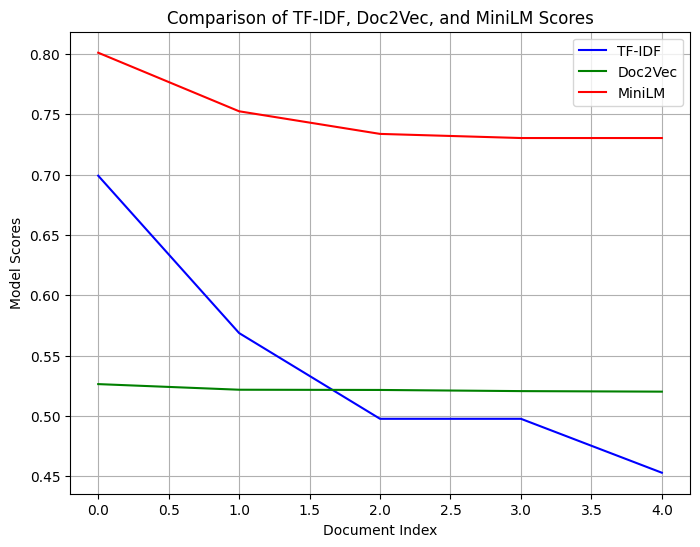

In [74]:
import matplotlib.pyplot as plt
import numpy as np

# Create separate lines for each model
plt.figure(figsize=(8, 6))
plt.plot(range(len(tfidf_scores)), tfidf_scores, label="TF-IDF", color="b")
plt.plot(range(len(doc2vec_scores)), doc2vec_scores, label="Doc2Vec", color="g")
plt.plot(range(len(minilm_scores)), minilm_scores, label="MiniLM", color="r")

# Add labels and title
plt.xlabel("Document Index")
plt.ylabel("Model Scores")
plt.title("Comparison of TF-IDF, Doc2Vec, and MiniLM Scores")
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


# Final Conclusion
In conclusion, based on the outcomes discussed above, it is evident that fundamental techniques like `TF-IDF` continue to perform remarkably well even without the use of neural networks. The results obtained with `Doc2Vec` demonstrate decent performance relying on fixed embeddings. However, the most effective technique appears to be the `MiniLM transformer-based` model, primarily owing to its utilization of **attention mechanisms** that can harness **contextualized embeddings**.